# Fase 2: Transformación de las imágenes recortadas

In [5]:
import os
files = ['Normal', 'Covid_positive', 'Lung_Opacity','Viral_Pneumonia']
path = "Dataset_Recortado"
data_dir = os.path.join(path)

data = []
mask = []

for id, level in enumerate(files):
    for file in os.listdir(os.path.join(data_dir, level)):
        data.append([level+"/"+file, level])

## Path de las imágenes recortadas

In [7]:
import pandas as pd 
data = pd.DataFrame(data, columns = ['image_file', 'corona_result'])


data['path'] = path + '/' +data['image_file']

data.head()

,image_file,corona_result,path
0,Normal/Normal-1.png,Normal,Dataset_Recortado/Normal/Normal-1.png
1,Normal/Normal-10.png,Normal,Dataset_Recortado/Normal/Normal-10.png
2,Normal/Normal-100.png,Normal,Dataset_Recortado/Normal/Normal-100.png
3,Normal/Normal-1000.png,Normal,Dataset_Recortado/Normal/Normal-1000.png
4,Normal/Normal-10000.png,Normal,Dataset_Recortado/Normal/Normal-10000.png


## Mostrando imagen original recortada

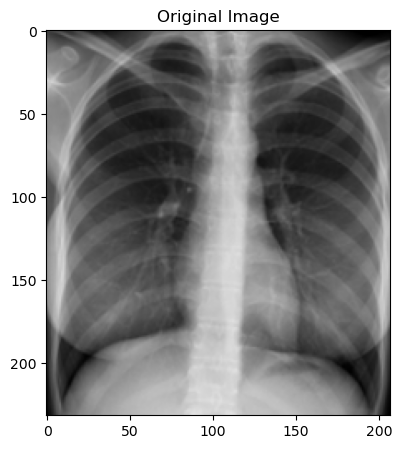

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Cargar la imagen original y la imagen binarizada
imagen_recortada = cv2.imread(data["path"][15])

#Mostrar las imágenes
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(imagen_recortada, cv2.COLOR_BGR2RGB))

## Transformación B-Channel

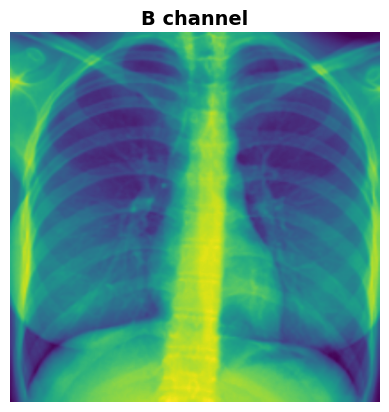

In [10]:
def convertir_BChannel(img):
    img = cv2.resize(img, (512, 512))
    return img[:, :, 0]

img = convertir_BChannel(imagen_recortada)
plt.title('B channel',fontsize = 14,weight = 'bold')
plt.imshow(img)
plt.axis('off')
plt.show()


## Transformación BEN GRAHAM

(-0.5, 511.5, 511.5, -0.5)

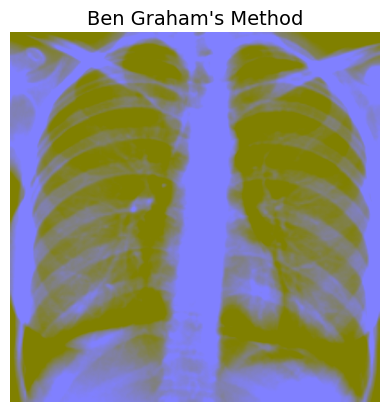

In [11]:
def convertir_BenGraham(img):
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img = cv2.addWeighted (img, 4, cv2.GaussianBlur(img, (0,0), 512/10), -4, 128)
    return img    

img = convertir_BenGraham(imagen_recortada)
plt.title("Ben Graham's Method", fontsize = 14)
plt.imshow(img)
plt.axis('off')

## ColorMAP JET

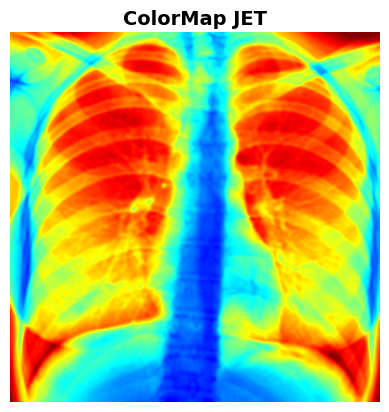

In [12]:
def convertir_ColorMapJET(img):
    img = cv2.resize(img, (512, 512))
    img = cv2.applyColorMap(img, cv2.COLORMAP_JET)
    return img

img = convertir_ColorMapJET(imagen_recortada)
plt.title('ColorMap JET',fontsize = 14,weight = 'bold')
plt.imshow(img)
plt.axis('off')
plt.show()


## Guardando las imágenes transformadas

In [13]:
#Paths y classes
path = "Dataset_Recortado"
classes = ['Normal', 'Covid_positive', 'Lung_Opacity', 'Viral_Pneumonia']
transformation_types = ['B-Channel','ColorMap_JET', 'BEN_GRAHAM']

In [14]:
#Funciones de transformación
def convertBChannel(img):
    img_bgr = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    return img_bgr[:, :, 0]


def convertColorMapJET(img):
    img_bgr = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    img_colormap = cv2.applyColorMap(img_bgr, cv2.COLORMAP_JET)
    return img_colormap


def convertBenGraham(img):
    img_bgr = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
    img_weighted = cv2.addWeighted(img_hsv, 4, cv2.GaussianBlur(img_hsv, (0,0), 512/10), -4, 128)
    return img_weighted


#Crea un directorio para cada tipo de transformación
for transformation in transformation_types:
    transformation_dir = os.path.join(path, transformation)
    if not os.path.exists(transformation_dir):
        os.makedirs(transformation_dir)
    for class_name in classes:
        class_dir = os.path.join(transformation_dir, class_name)
        if not os.path.exists(class_dir):
            os.makedirs(class_dir)

#Aplica las transformaciones y guarda las imgs 
for class_name in classes:
    class_dir = os.path.join(path, class_name)
    for file_name in os.listdir(class_dir):
        file_path = os.path.join(class_dir, file_name)
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # or cv2.IMREAD_COLOR for RGB
        image = cv2.resize(image, (299, 299))  
        
        #Transformaciones
        b_channel_img = convertBChannel(image)
        colormap_jet_img = convertColorMapJET(image)
        ben_graham_img = convertBenGraham(image)
        
        #Guardando imgs
        cv2.imwrite(os.path.join(path, 'B-Channel', class_name, file_name), b_channel_img)
        cv2.imwrite(os.path.join(path, 'ColorMap_JET', class_name, file_name), colormap_jet_img)
        cv2.imwrite(os.path.join(path, 'BEN_GRAHAM', class_name, file_name), ben_graham_img)
